In [2]:
# default_exp orbital

# Visualizing the SpaceX Tesla Roadster trip to Mars
Example taken from [poliastro docs](
https://hub.gke2.mybinder.org/user/poliastro-poliastro-4oek8xlv/notebooks/docs/source/examples/Visualizing%20the%20SpaceX%20Tesla%20Roadster%20trip%20to%20Mars.mystnb).

In [12]:
from astropy.time import Time
from astropy import units as u

from poliastro.bodies import Earth, Mars, Sun
from poliastro.ephem import Ephem
from poliastro.frames import Planes
from poliastro.plotting import OrbitPlotter3D
from poliastro.util import time_range

EPOCH = Time("2018-02-18 12:00:00", scale="tdb")

In [13]:
# More info: https://plotly.com/python/renderers/
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook_connected"

In [15]:
roadster = Ephem.from_horizons(
    "SpaceX Roadster",
    epochs=time_range(EPOCH, end=EPOCH + 360 * u.day),
    attractor=Sun,
    plane=Planes.EARTH_ECLIPTIC
)
roadster

Ephemerides at 50 epochs from 2018-02-18 12:00:00.000 (TDB) to 2019-02-13 12:00:00.000 (TDB)

In [16]:
from poliastro.plotting.misc import plot_solar_system

CPU times: user 156 ms, sys: 125 ms, total: 281 ms
Wall time: 119 ms


([<matplotlib.lines.Line2D at 0x7f078c33c130>],
 <matplotlib.lines.Line2D at 0x7f078c33c430>)

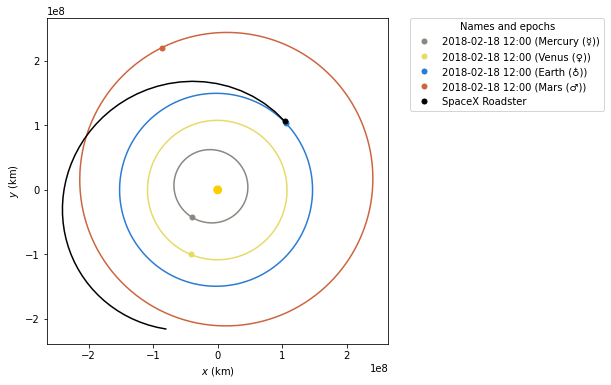

In [118]:
%%time
frame = plot_solar_system(outer=False, epoch=EPOCH)
frame = frame.plot_ephem(roadster, EPOCH, label="SpaceX Roadster", color="black")
frame

In [65]:
type(frame[0][0])

matplotlib.lines.Line2D

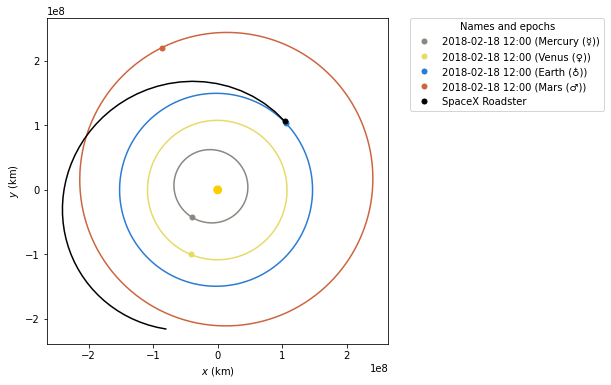

In [64]:
frame[0][0].figure

In [66]:
frame = OrbitPlotter3D(plane=Planes.EARTH_ECLIPTIC)

frame.plot_body_orbit(Earth, EPOCH)
frame.plot_body_orbit(Mars, EPOCH)

frame.plot_ephem(roadster, EPOCH, label="SpaceX Roadster", color="black")

frame.set_view(45 * u.deg, -120 * u.deg, 4 * u.km);

In [71]:
type(frame)

poliastro.plotting.core.OrbitPlotter3D

Help from https://github.com/JackCSheehan/orbital-decay-simulator

https://github.com/JackCSheehan/orbital-decay-simulator/blob/main/src/plotting.py

In [78]:
from poliastro.earth.plotting import GroundtrackPlotter
f = GroundtrackPlotter()

# Map element colors
_LAND_COLOR = "white"
_WATER_COLOR = "rgb(140, 181, 245)"
_COUNTRY_COLOR = "lightgray"

f.fig.update_geos(
    projection_type = "orthographic",
    bgcolor = "rgba(0, 0, 0, 0)",
    showframe = False,
    lataxis = {"showgrid" : False},
    lonaxis = {"showgrid" : False},
    showlakes = True,
    showcountries = True,
    showrivers = True,
    oceancolor = _WATER_COLOR,
    landcolor = _LAND_COLOR,
    lakecolor = _WATER_COLOR,
    rivercolor = _WATER_COLOR,
    countrycolor = _COUNTRY_COLOR,
)

f.fig.update_layout(
    showlegend = False,
    margin = {"l" : 0, "r" : 0, "b" : 0, "t" : 0}
)

# New Horizons launch and trajectory¶
example from  
https://docs.poliastro.space/en/stable/examples/Exploring%20the%20New%20Horizons%20launch.html

In [79]:
from astropy import time
from astropy import units as u

from poliastro import iod

from poliastro.bodies import Sun, Earth, Jupiter
from poliastro.ephem import Ephem
from poliastro.frames import Planes
from poliastro.plotting import StaticOrbitPlotter
from poliastro.twobody import Orbit
from poliastro.util import norm

[0.         8.54433234 0.        ] km / s
[-0.12443111  8.54324645  0.        ] km / s


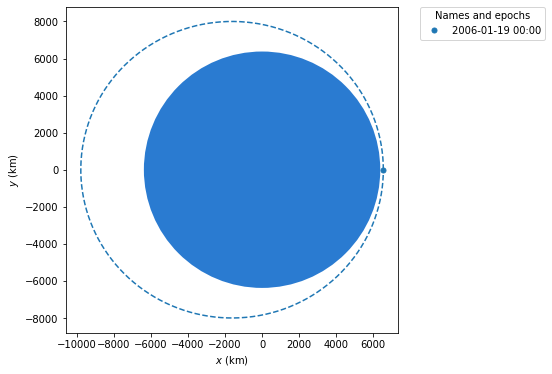

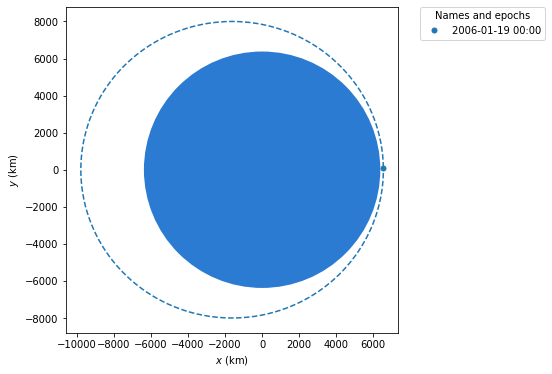

In [115]:
r_p = Earth.R + 165 * u.km
r_a = 1.5 * Earth.R + 215 * u.km

a_parking = (r_p + r_a) / 2
ecc_parking = 1 - r_p / a_parking


def plot_orbit(i):
    parking = Orbit.from_classical(
        Earth,
        a_parking,
        ecc_parking,
        0 * u.deg,
        0 * u.deg,
        0 * u.deg,
        i * u.deg,  # We don't mind
        time.Time("2006-01-19", scale="utc"),
    )
    print(parking.v)
    return parking.plot()


for i in range(2):
    plot_orbit(i)

[-5.46169725  5.99750109  0.        ] km / s
CPU times: user 188 ms, sys: 0 ns, total: 188 ms
Wall time: 32.3 ms


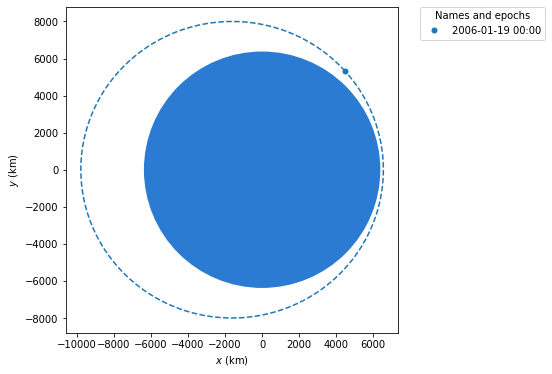

In [117]:
%%time
plot_orbit(50)

Example of StaticOrbitPlotter

In [121]:
from astropy.time import Time
from matplotlib import pyplot as plt
from poliastro.bodies import Earth, Mars, Jupiter, Sun
from poliastro.frames import Planes
from poliastro.plotting import StaticOrbitPlotter
from poliastro.twobody import Orbit

CPU times: user 125 ms, sys: 62.5 ms, total: 188 ms
Wall time: 90.6 ms


([<matplotlib.lines.Line2D at 0x7f077eda1b20>],
 <matplotlib.lines.Line2D at 0x7f077edf6e20>)

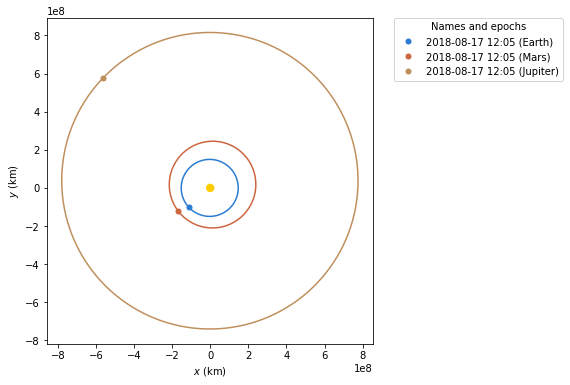

In [143]:
%%time
epoch = Time("2018-08-17 12:05:50", scale="tdb")

plotter = StaticOrbitPlotter(plane=Planes.EARTH_ECLIPTIC)
plotter.plot_body_orbit(Earth, epoch, label="Earth")
plotter.plot_body_orbit(Mars, epoch, label="Mars")
plotter.plot_body_orbit(Jupiter, epoch, label="Jupiter");

In [146]:
# Compare matplotlib plotting time with altair

In [147]:
import altair as alt
import numpy as np
import pandas as pd

In [134]:
%%time

x = np.arange(100)
source = pd.DataFrame({
  'x': x,
  'f(x)': np.sin(x / 5)
})

alt.Chart(source).mark_line().encode(
    x='x',
    y='f(x)'
)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.6 ms


alt.Chart(...)